##### Some description about the data :
Seattle Rain Predictions

1. Description
Besides coffee, grunge and technology companies, one of the things that Seattle is most famous for is how often it rains. This dataset contains complete records of daily rainfall patterns from January 1st, 1948 to December 12, 2017.

The dataset contains five columns:

DATE = the date of the observation

PRCP = the amount of precipitation, in inches

TMAX = the maximum temperature for that day, in degrees Fahrenheit

TMIN = the minimum temperature for that day, in degrees Fahrenheit

RAIN = TRUE if rain was observed on that day, FALSE if it was not

##### Source :- https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017

### Problem Statement
Based on given data set predict whether if there was rain observed on a day or not.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Imputer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

In [61]:
df=pd.read_csv('seattleWeather_1948-2017.csv')
df.shape
type(df)

pandas.core.frame.DataFrame

In [62]:
df.head()
df['DATE'][0]

'1948-01-01'

In [63]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


##### Observe the Mean and the Max. The Max seems to be an outlier, which can be clearly visualized in the Box plot below

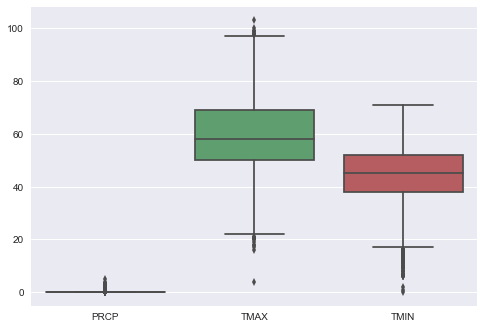

In [64]:
sns.boxplot(data=df[['PRCP','TMAX','TMIN']])
plt.show()

#### The max point of the whisker is given by Q3+1.5*(IQR) and the min point is given by Q1-1.5*(IQR).

In [65]:
tmax=df['TMAX'].quantile([0.25,0.75])
tmin=df['TMIN'].quantile([0.25,0.75])
prcp=df['PRCP'].quantile([0.25,0.75])
type(prcp)

pandas.core.series.Series

In [66]:
q3_tmin=tmin[0.75]
q1_tmin=tmin[0.25]

q3_tmax=tmax[0.75]
q1_tmax=tmax[0.25]

q3_prcp=prcp[0.75]
q1_prcp=prcp[0.25]


In [67]:
iqr_tmin=q3_tmin-q1_tmin
iqr_tmax=q3_tmax-q1_tmin
iqr_prcp=q3_prcp-q1_prcp

In [80]:
df=df.drop(df[df['TMIN'] < q1_tmin-1.5*iqr_tmin].index)
df=df.drop(df[(df['TMAX'] < q1_tmax-1.5*iqr_tmax) | (df['TMAX'] > q3_tmax+1.5*iqr_tmax)].index)
df=df.drop(df[(df['PRCP'] < 0) | (df['PRCP'] > q3_prcp+1.5*iqr_prcp)].index)

In [81]:
df.shape

(21905, 5)

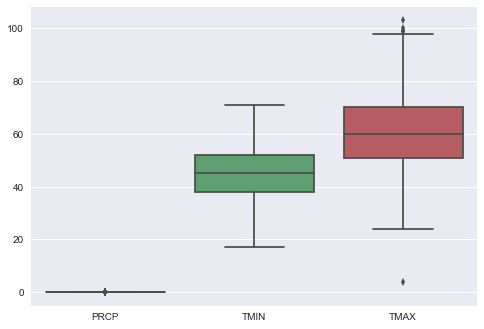

In [82]:
sns.boxplot(data=df[['PRCP','TMIN','TMAX']])
plt.show()

In [84]:
def did_rain(data):
    
    if data==True:
        temp=1
    else:
        temp=0
    
    return temp

Y = df['RAIN'].map(did_rain)

In [85]:
print(df.head(5))

          DATE  PRCP  TMAX  TMIN   RAIN
4   1948-01-05  0.17    45    32   True
7   1948-01-08  0.04    48    35   True
8   1948-01-09  0.12    50    31   True
10  1948-01-11  0.01    42    32   True
11  1948-01-12  0.00    41    26  False


In [86]:
df.isnull().any()

DATE    False
PRCP     True
TMAX    False
TMIN    False
RAIN     True
dtype: bool

In [108]:
df=df.drop(['DATE','RAIN'],axis=1)

In [109]:
df.head(5)

,PRCP,TMAX,TMIN
4,0.17,45,32
7,0.04,48,35
8,0.12,50,31
10,0.01,42,32
11,0.00,41,26


In [111]:
df['PRCP'].isnull().value_counts()

False    21902
True         3
Name: PRCP, dtype: int64

In [121]:
im=Imputer()
X=im.fit_transform(df)

In [123]:
sd=StandardScaler()
sd_data=sd.fit_transform(X)

In [119]:
Y.value_counts()

0    14580
1     7325
Name: RAIN, dtype: int64

In [124]:
X_train,X_test,Y_train,Y_test=train_test_split(sd_data,Y,test_size=30)